In [19]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd

In [21]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [69]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [80]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


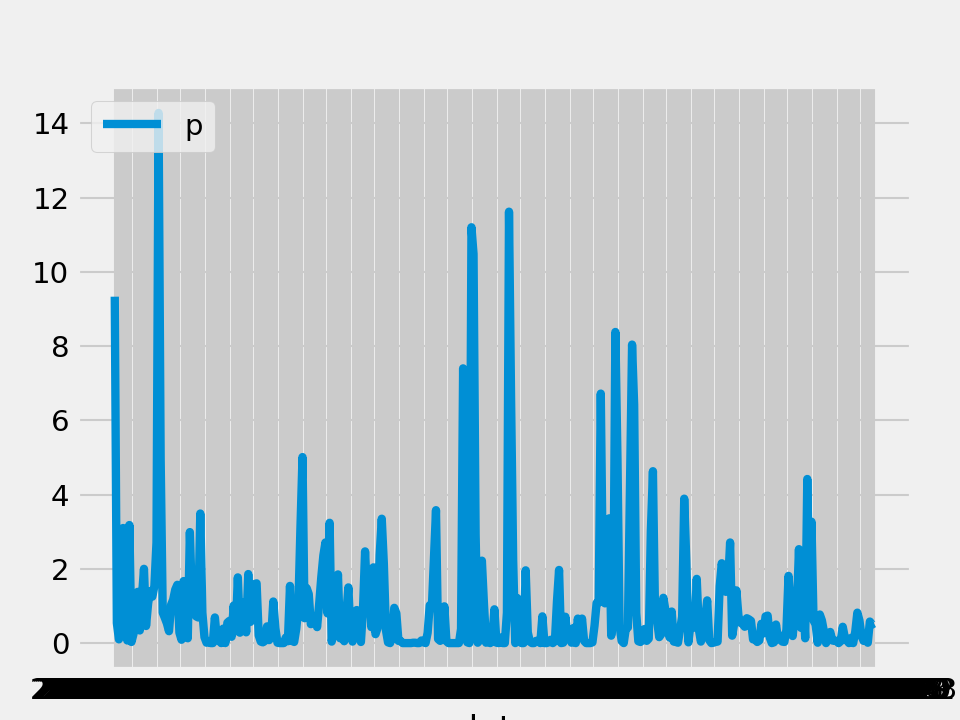

In [202]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
df = pd.read_sql("select * from measurement", conn)
# Calculate the date 1 year ago from today
highDate = df.date.max()
yearAgo = pd.to_datetime(highDate) + pd.Timedelta("-365 days")
yearAgo = yearAgo.strftime("%Y-%m-%d")
# Perform a query to retrieve the data and precipitation scores
lastYearData = df[df.date > yearAgo]
lastYearData = lastYearData.drop(columns=["id", "station", "tobs"])
# Save the query results as a Pandas DataFrame and set the index to the date column
lastYearData = lastYearData.fillna(0)
lastYearData = lastYearData.groupby("date").sum()
# Sort the dataframe by date
lastYearData = lastYearData.reset_index()
lastYearData = lastYearData.set_index("date")
lastYearData.head()
# lastYearData = lastYearData.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
dates = lastYearData.index.values
precip = lastYearData["prcp"]
precip = [p for p in precip]
# plt.figure(figsize=(10,20))
plt.plot(dates, precip)
plt.legend("precipitation", loc="upper left")
plt.xlabel("date")
plt.show()
# Rotate the xticks for the dates


In [188]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lastYearData["prcp"].describe()

count    365.000000
mean       0.974164
std        1.776466
min        0.000000
25%        0.050000
50%        0.400000
75%        1.080000
max       14.280000
Name: prcp, dtype: float64

In [189]:
# How many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [138]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [137]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


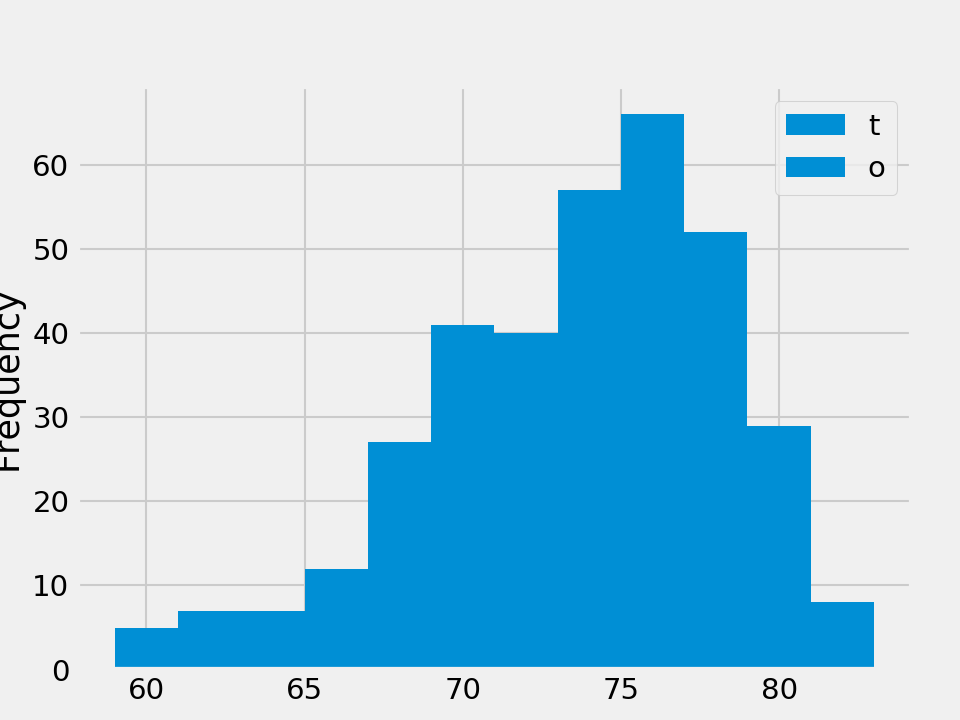

In [183]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df = pd.read_sql("select * from measurement", conn)
highDate = df.date.max()
yearAgo = pd.to_datetime(highDate) + pd.Timedelta("-365 days")
yearAgo = yearAgo.strftime("%Y-%m-%d")
observations = df[(df.station == "USC00519281") & (df.date > yearAgo)]
tobs = observations.tobs
plt.ylabel("Frequency")
tobs.plot.hist(bins=12)
plt.legend("tobs")
plt.show()